In [1]:
import subprocess
import igraph as ig
import leidenalg as la
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
# Define the command to run the script in Kernel A's environment
command = ["conda", "run", "-n", "Work_2", "python", "Retrieve_GRN_from_KG.py", "-f","Data/HIVE_tomatoraw_ly3_ls80_ep300_gene_selection_138bins.txt"]
# Execute the command
result = subprocess.run(command, capture_output=True, text=True)

In [2]:
# File path for the edge list file
file_path = 'Data/Network_GRN_HIVE.txt'

net = pd.read_csv(file_path, sep='\t')
curated = net[net['reg.evidence'] != 'motif']

# Create an igraph Graph from the edge list
graph = ig.Graph.TupleList(curated[['tf.name', 'target.name']].itertuples(index=False), directed=True)

# Print summary of the graph
print("Summary of the graph:")
print("Number of vertices:", graph.vcount())
print("Number of edges:", graph.ecount())

Summary of the graph:
Number of vertices: 1786
Number of edges: 4201


In [11]:
curated.to_csv('Data/Network_GRN_HIVE_curated.txt',sep='\t', index=False)

In [9]:
with open('Data/HIVE_tomatoraw_ly3_ls80_ep300_gene_selection_138bins.txt','r') as file:
    line_count = sum(1 for line in file)
print('Number of genes lost from Hive List:', line_count - graph.vcount())

Number of genes lost from Hive List: 3775


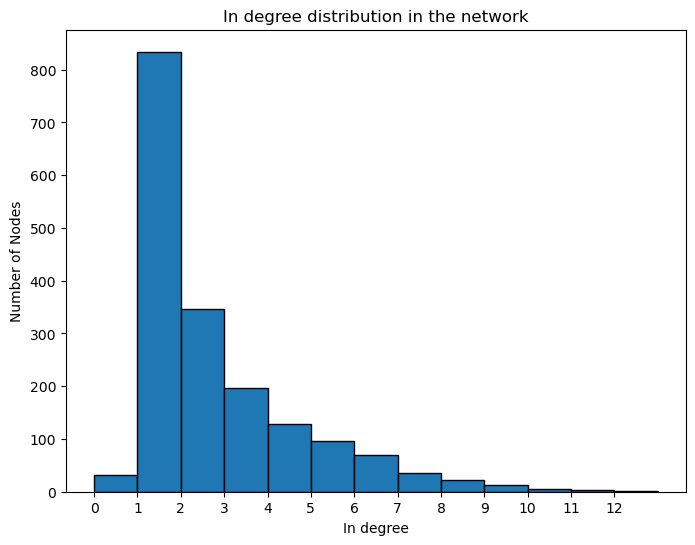

In [3]:
indegree = graph.indegree()
# Calculate bin edges
bins = range(min(graph.indegree()), max(graph.indegree()) + 2)

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(indegree, bins=bins, edgecolor='black', align='mid')

# Set x-axis ticks to integers
plt.xticks(range(min(graph.indegree()), max(graph.indegree()) + 1))

# Add labels and title
plt.xlabel('In degree')
plt.ylabel('Number of Nodes')
plt.title('In degree distribution in the network')
# plt.savefig('./Results/Plot/In_degree_GRN.svg',format='svg')
# Show the plot
plt.show()

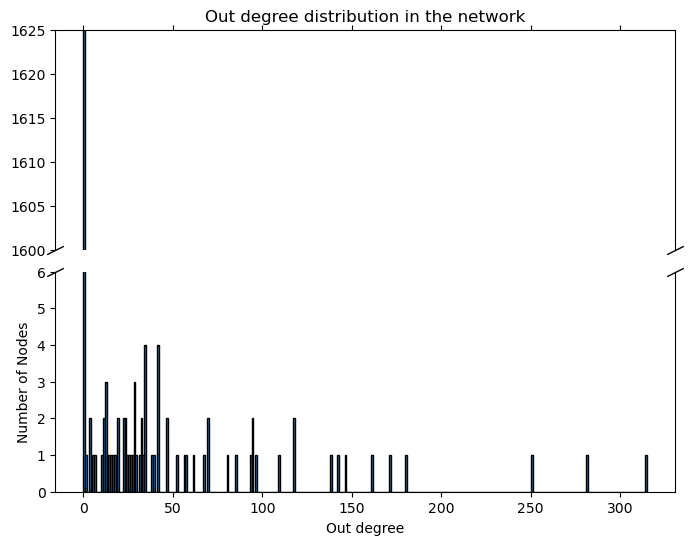

In [4]:
outdegree = graph.outdegree()
bins = range(min(outdegree), max(outdegree)+1)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
fig.subplots_adjust(hspace=0.1)  # adjust space between Axes

# plot the same data on both Axes
ax1.hist(outdegree, bins=bins, edgecolor='black')
ax2.hist(outdegree, bins=bins, edgecolor='black')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(1600, 1625)  # outliers only
ax2.set_ylim(0, 6)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the Axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the Axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_xlabel('Out degree')
ax2.set_ylabel('Number of Nodes')
ax1.set_title('Out degree distribution in the network')
# plt.savefig('./Results/Plot/Out_degree_GRN.svg',format='svg')
plt.show()

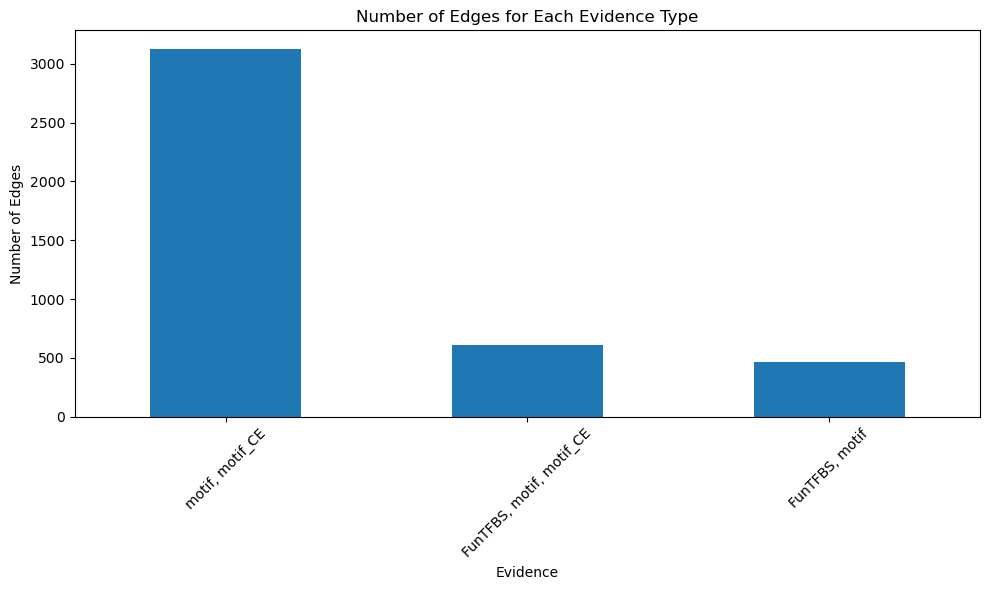

In [5]:
# Create a bar plot for the number of edges with corresponding evidence
evidence_counts = curated['reg.evidence'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
evidence_counts.plot(kind='bar')
plt.xlabel('Evidence')
plt.ylabel('Number of Edges')
plt.title('Number of Edges for Each Evidence Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()